# Fundamentos IA y Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 2
<p>Entrenamiento y evaluación:<br>Calcular métricas de evaluación en regresión, clasificación binaria y multiclase.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
import numpy as np
import math

# Trabajar con dataset
import pandas as pd

# Presentación de datos
import seaborn as sns
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

En base al conjunto de datos con una variable objetivo real y salida proporcionada con dos modelos distintos.

<div style="font-size:14px; text-align:justify"><b>1: </b>Calcular métricas de regresión para cada modelo.</div>

In [2]:
# Cargar el dataset
df = pd.read_csv('l2p1.csv')

display(df.head(), 'Total resultados:', df.count())

,Y objetivo,Predicciones M1,Predicciones M2
0,2.50,3.0,2.0
1,3.00,2.9,2.0
2,1.60,2.0,2.0
3,8.00,8.1,7.0
4,4.56,4.0,5.0


'Total resultados:'

Y objetivo         30
Predicciones M1    30
Predicciones M2    30
dtype: int64

<div style="font-size:14px; text-align:center"><b>MAE</b><br></div>

In [3]:
# ERROR ABSOLUTO MEDIO (Mean Absolute Error)
def mae(pred, obj):
    '''
    Media de las diferencias absolutas entre y' e y
    '''
    dif = 0
    # Sumatorio de los errores para cada predicción
    for y_pred, y in zip(pred, obj):
        dif += abs(y - y_pred)
    
    # Media del sumatorio de errores
    return round(dif/len(pred), 2)

print(f'''MAE de "Predicciones M1": {mae(df['Predicciones M1'], df['Y objetivo'])}''')
print(f'''MAE de "Predicciones M2": {mae(df['Predicciones M2'], df['Y objetivo'])}''')

MAE de "Predicciones M1": 1.04
MAE de "Predicciones M2": 0.61


<div style="font-size:14px; text-align:center"><b>MSE</b><br></div>

In [4]:
# ERROR CUADRÁTICO MEDIO  (Mean Squared Error)
def mse(pred, obj):
    '''
    Media de las diferencias al cuadrado entre y' e y
    '''
    dif = 0
    # Sumatorio de los errores para cada predicción
    for y_pred, y in zip(pred, obj):
        dif += (y - y_pred)**2
    
    # Media del sumatorio de errores
    return round(dif/len(pred), 2)

print(f'''MSE de "Predicciones M1": {mse(df['Predicciones M1'], df['Y objetivo'])}''')
print(f'''MSE de "Predicciones M2": {mse(df['Predicciones M2'], df['Y objetivo'])}''')
    

MSE de "Predicciones M1": 7.98
MSE de "Predicciones M2": 0.52


<div style="font-size:14px; text-align:center"><b>RMSE</b><br></div>

In [5]:
# RAIZ CUADRADA DEL ERROR CUADRÁTICO MEDIO  (Root Mean Squared Error)
def rmse(pred, obj):
    '''
    Raiz de MSE para igualar medidas del error y variable objetivo
    '''
    dif = 0
    # Sumatorio de los errores para cada predicción
    for y_pred, y in zip(pred, obj):
        dif += (y - y_pred)**2
    
    # Raiz cuadrada de la media del sumatorio de errores
    return round(math.sqrt(round(dif/len(pred), 2)),2)

print(f'''RMSE de "Predicciones M1": {rmse(df['Predicciones M1'], df['Y objetivo'])}''')
print(f'''RMSE de "Predicciones M2": {rmse(df['Predicciones M2'], df['Y objetivo'])}''')

RMSE de "Predicciones M1": 2.82
RMSE de "Predicciones M2": 0.72


<div style="font-size:14px; text-align:center"><b>COEFICIENTE R</b><br></div>

In [6]:
# COEFICIENTE DE DETERMINACIÓN
def r_2(pred, obj):
    '''
    Calidad para predecir resultados. Acotado entre 0 y 1
    '''
    ss_res = 0
    ss_tot = 0
    for y_pred, y in zip(pred, obj):
        ss_res += (y - y_pred)**2
        ss_tot += (y - obj.mean())**2
        
    return round(1-(ss_res/ss_tot), 10)

# COEFICIENTE DE VARIACIÓN
def r_pearson(pred,obj):
    sum_covar = 0
    pred_var = 0
    obj_var = 0
    for y_pred, y in zip(pred, obj):
        sum_covar += (y_pred - pred.mean())*(y - obj.mean())
        pred_var += (y_pred - pred.mean())**2
        obj_var += (y - obj.mean())**2
        
    return round((sum_covar**2/(pred_var*obj_var)) ,10)
    
print(f''' Coeficiente determinación de "Predicciones M1": {r_2(df['Predicciones M1'], df['Y objetivo'])}''')
print(f''' Coeficiente variación de Pearson de "Predicciones M1": {r_pearson(df['Predicciones M1'], df['Y objetivo'])}''')
print(f''' Coeficiente determinación de "Predicciones M2": {r_2(df['Predicciones M2'], df['Y objetivo'])}''')
print(f''' Coeficiente variación de Pearson de "Predicciones M2": {r_pearson(df['Predicciones M2'], df['Y objetivo'])}''')

 Coeficiente determinación de "Predicciones M1": 0.5991824683
 Coeficiente variación de Pearson de "Predicciones M1": 0.6280712461
 Coeficiente determinación de "Predicciones M2": 0.9737934691
 Coeficiente variación de Pearson de "Predicciones M2": 0.9785384481


<div style="font-size:14px; text-align:justify"><b>2: </b>Decidir que modelo es mejor.</div>

En base al **coeficiente de determinación** el mejor modelo se trata de **M1**. Dado que este valor se aproxima más a 1, lo cual nos indica que es capaz de precedecir mejor, tiene menor error, como también lo demuestra RMSE, con un valor inferior al igual que MSE y MAE (Media de errores inferior).

Además, como se aprecia en la siguiente gráfica, los valores para **M1**, coindicen un número mayor de veces así como quedar más cercanos a la curva objetivo.

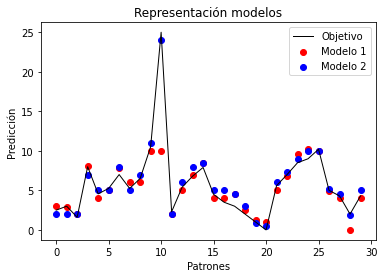

In [7]:
fig, ax = plt.subplots()
# Plot 'Y Objetivo'
obj, = ax.plot(df.index, df['Y objetivo'], color="black", linewidth=1, label='Objetivo')
# Plot Prediccion modelos
mod_1 = plt.scatter(df.index, df['Predicciones M1'], color="red", label='Modelo 1')
mod_2 = plt.scatter(df.index, df['Predicciones M2'], color="blue", label='Modelo 2')

ax.legend()
plt.title('Representación modelos')
plt.xlabel('Patrones')
plt.ylabel('Predicción')
plt.show()

<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br></div>

En base a un problema de clasificación binaria, existe la salida para dos patrones distintos.

***Fuente:***<br>*https://es.wikihow.com/calcular-la-sensibilidad,-la-especificidad,-el-valor-predictivo-positivo-y-el-valor-predictivo-negativo*

<div style="font-size:14px; text-align:justify"><b>1: </b>Crear la matriz de confusión de cada modelo.</div>

In [8]:
# Cargar el dataset
df = pd.read_csv('l2p2.csv')

display(df.head(), 'Total resultados:', df.count())

,Clase Objetivo,Predicciones M1,Predicciones M2
0,0,1,0
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1


'Total resultados:'

Clase Objetivo     30
Predicciones M1    30
Predicciones M2    30
dtype: int64

<div style="font-size:14px; text-align:center"><b>MATRIZ DE CONFUSION</b><br></div>

In [9]:
def conf_matrix(pred, obj):
    '''
    Obtener la cantidad de aciertos y fallos del modelo
    '''
    tp=0
    tn=0
    fp=0
    fn=0
    for y_pred, y in zip(pred, obj):
        # True Positive
        if y == 1 and y_pred == 1:
            tp += 1
        # False Negative
        elif y == 1 and y_pred == 0:
            fn += 1
        # False Positive
        elif y == 0 and y_pred == 1:
            fp += 1
        # True Negative
        elif y == 0 and y_pred == 0:
            tn += 1
    
    return tp, fn, fp, tn

tp_m1, fn_m1, fp_m1, tn_m1 = conf_matrix(df['Predicciones M1'], df['Clase Objetivo'])
tp_m2, fn_m2, fp_m2, tn_m2 = conf_matrix(df['Predicciones M2'], df['Clase Objetivo'])

# Modelo 1
print(f'Matriz Confusion Modelo 1 para {tp_m1+fn_m1+fp_m1+tn_m1} valores')
print(f'''True Positive:  {tp_m1} | False Negative: {fn_m1}\n
False Positive: {fp_m1} | True Negative: {tn_m1}\n''')
# Modelo 2
print(f'Matriz Confusion Modelo 2 para {tp_m2+fn_m2+fp_m2+tn_m2} valores')
print(f'''True Positive:  {tp_m2} | False Negative: {fn_m2}\n
False Positive: {fp_m2} | True Negative: {tn_m2}\n''')

Matriz Confusion Modelo 1 para 30 valores
True Positive:  6 | False Negative: 4

False Positive: 1 | True Negative: 19

Matriz Confusion Modelo 2 para 30 valores
True Positive:  9 | False Negative: 1

False Positive: 8 | True Negative: 12



De un modo más visual:

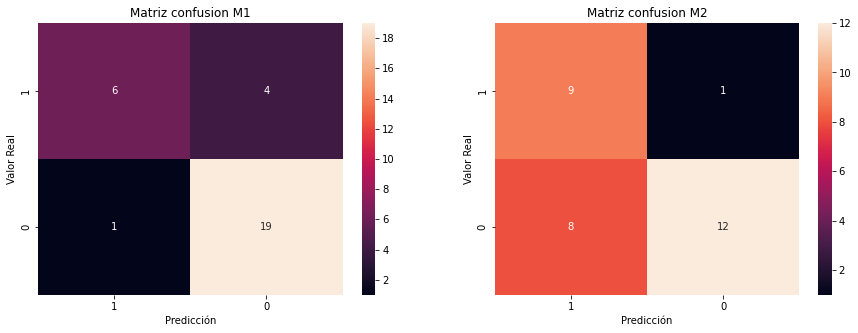

In [10]:
# Obtener valores
cf_matrix_m1 = conf_matrix(df['Predicciones M1'], df['Clase Objetivo'])
cf_matrix_m2 = conf_matrix(df['Predicciones M2'], df['Clase Objetivo'])

# Convertir en array
cf_matrix_m1 = np.asarray([[cf_matrix_m1[0],cf_matrix_m1[1]], [cf_matrix_m1[2],cf_matrix_m1[3]]])
cf_matrix_m2 = np.asarray([[cf_matrix_m2[0],cf_matrix_m2[1]], [cf_matrix_m2[2],cf_matrix_m2[3]]])

# Plotear matrices
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

sns.heatmap(cf_matrix_m1, annot=True,
            xticklabels= [1,0], yticklabels= [1,0], ax=axes[0]).set(
    title='Matriz confusion M1', 
    xlabel='Predicción', ylabel='Valor Real')
sns.heatmap(cf_matrix_m2, annot=True,
            xticklabels= [1,0], yticklabels= [1,0], ax=axes[1]).set(
    title='Matriz confusion M2',
    xlabel='Predicción', ylabel='Valor Real')

plt.show()

<div style="font-size:14px; text-align:justify"><b>2: </b>Calcular métricas de clasificación salvo AUC.</div>

<div style="font-size:14px; text-align:center"><b>Accuracy - CCR</b><br></div>

In [11]:
# PRECISIÓN GLOBAL
def ccr (data, tp, tn):
    '''
    Patrones correctamente clasificados
    '''
    return round(((tp+tn)/data), 2)

print(ccr(30, tp_m1, tn_m1))
print(ccr(30, tp_m2, tn_m2))

0.83
0.7


<div style="font-size:14px; text-align:center"><b>Recall - TP Rate</b><br></div>

In [12]:
# SENSIBILIDAD
def sensibility (tp, fn):
    '''
    Patrones positivos predichos como positivos
    '''
    return round(tp/(tp+fn),2)

print(sensibility(tp_m1, fn_m1))
print(sensibility(tp_m2, fn_m2))

0.6
0.9


<div style="font-size:14px; text-align:center"><b>False Positive Rate</b><br></div>

In [13]:
def fp_rate(fp, tn):
    '''
    Patrones negativos predichos como positivos
    '''
    return round(fp/(fp+tn),2)

print(fp_rate(fp_m1, tn_m1))
print(fp_rate(fp_m2, tn_m2))

0.05
0.4


<div style="font-size:14px; text-align:center"><b>Especificidad</b><br></div>

In [14]:
def especifidad (tn, fp):
    '''
    Patrones negativos bien predichos
    '''
    return round(tn/(tn+fp),2)

print(especifidad(tn_m1, fp_m1))
print(especifidad(tn_m2, fp_m2))

0.95
0.6


<div style="font-size:14px; text-align:center"><b>Precisión</b><br></div>

In [15]:
def precision(tp, fp):
    '''
    Patrones positivos verdaderos respecto a todos los predichos verdaderos
    '''
    return round(tp/(tp+fp),2)

print(precision(tp_m1, fp_m1))
print(precision(tp_m2, fp_m2))

0.86
0.53


<div style="font-size:14px; text-align:center"><b>F1-Score</b><br></div>

In [16]:
def f1_score(tp, fp, fn):
    '''
    Relación entre sensibilidad y precision
    '''
    return round((2*tp)/(2*tp+fp+fn),2)

print(f1_score(tp_m1, fp_m1, fn_m1))
print(f1_score(tp_m2, fp_m2, fn_m2))

0.71
0.67


<div style="font-size:14px; text-align:center"><b>Kappa</b><br></div>

In [17]:
def kappa(tp, tn, fp, fn):
    '''
    Relación de los valores predichos con los reales.
    '''
    return round((2*(tp*tn-fn+fp))/((tp+fp)*(fp+tn)+(tp+fn)*(fn+tn)),2)

print(kappa(tp_m1, tn_m1, fp_m1, fn_m1))
print(kappa(tp_m2, tn_m2, fp_m2, fn_m2))   

0.6
0.49


<div style="font-size:14px; text-align:justify"><b>3: </b>Determinar qué modelo es mejor.</div>

In [18]:
def info_model(model, tp, tn, fp, fn):
    print(f'Resultados {model}')
    print(f'- CCR: {ccr((tp+tn+fp+fn), tp, tn)}')
    print(f'- Recall: {sensibility(tp, fn)}')
    print(f'- FP-Rate: {fp_rate(fp, tn)}')
    print(f'- Especifidad: {especifidad(tn, fp)}')
    print(f'- Precision: {precision(tp, fp)}')
    print(f'- F1_Score: {f1_score(tp, fp, fn)}')
    print(f'- Kappa: {kappa(tp, tn, fp, fn)}\n')
    
info_model('Modelo 1', tp_m1, tn_m1, fp_m1, fn_m1)
info_model('Modelo 2', tp_m2, tn_m2, fp_m2, fn_m2)

Resultados Modelo 1
- CCR: 0.83
- Recall: 0.6
- FP-Rate: 0.05
- Especifidad: 0.95
- Precision: 0.86
- F1_Score: 0.71
- Kappa: 0.6

Resultados Modelo 2
- CCR: 0.7
- Recall: 0.9
- FP-Rate: 0.4
- Especifidad: 0.6
- Precision: 0.53
- F1_Score: 0.67
- Kappa: 0.49



Primero de todo, observar que se trata de un set de datos **balanceado** por su matriz de confusión.

Atendiendo a la métrica de **F1-Score**, el modelo mejor se trata del 1. Además, si nos centramos en la Precision, vemos que el modelo 2, ha asignado erroneamente más positivos (8) que el modelo 1 (1) lo cual se puede observar en **FP-Rate**.<br>
Además, si atendemos a la métrica **Kappa**, se ve como el **modelo 1** se ajusta más a los valores reales.

<div style="font-size:14px; text-align:justify"><b>TERCERA PARTE.-</b><br></div>

Calcular las métricas de clasificación para un set de datos multivariable.

***Fuente:***<br>*https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/*

<div style="font-size:14px; text-align:center"><b>Calculo de matriz de confusión.</b><br></div>

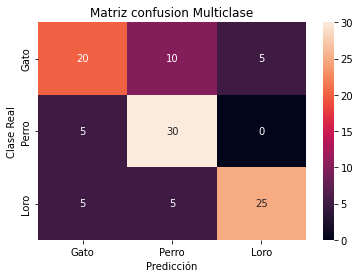

In [19]:
# Convertir en array
cf_matrix_multiclass = np.asarray([[20, 10, 5],
                        [5, 30, 0],
                        [5, 5, 25]])

# Plotear matrices
sns.heatmap(cf_matrix_multiclass, annot=True, 
            xticklabels= ['Gato', 'Perro', 'Loro'], 
            yticklabels= ['Gato', 'Perro', 'Loro']).set(
    title='Matriz confusion Multiclase', 
    xlabel='Predicción', ylabel='Clase Real')


plt.show()

In [20]:
def info_class(cfm, index:int):
    '''
    TN, FN, TP, FP para la clase en set multiclase
    '''
    # Valor de la diagonal coincidente con la prediccion y real
    tp=cfm[index][index]
    
    # Valores fuera de la fila y columna de la clase
    tn=0
    # Recorrer filas no coincidentes con clase
    for i in range(len(cfm)):
        if i != index:
            # Recorrer columnas no coincidentes con la clase
            for j in range(len(cfm)):
                if j != index:
                    tn += cfm[i][j]
        
            
    # Valores de la clase en columna no coincidentes con el valor real
    fp=sum([cfm[x][index] for x in range(len(cfm)) if x != index])
    
    # Valores de la clase en fila no coincidentes con el valor real
    fn=sum([cfm[index][x] for x in range(len(cfm)) if x != index])
    
    return tp, fp, fn, tn


def info_class_print(class_name:str, values:list):
    print(f'''Valores de clase "{class_name}":
    TP: {values[0]} -- FP: {values[1]}
    FN: {values[2]} -- TN: {values[3]}\n''')

    
# Obtener valores
cfm_values_gato = info_class(cf_matrix_multiclass, 0)
cfm_values_perro = info_class(cf_matrix_multiclass, 1)
cfm_values_loro = info_class(cf_matrix_multiclass, 2)

# Imprimir valores
info_class_print('Gato', cfm_values_gato)
info_class_print('Perro', cfm_values_perro)
info_class_print('Loro', cfm_values_loro)

Valores de clase "Gato":
    TP: 20 -- FP: 10
    FN: 15 -- TN: 60

Valores de clase "Perro":
    TP: 30 -- FP: 15
    FN: 5 -- TN: 55

Valores de clase "Loro":
    TP: 25 -- FP: 5
    FN: 10 -- TN: 65



<div style="font-size:14px; text-align:center"><b>Métricas</b><br></div>

In [21]:
info_model('Gato', cfm_values_gato[0], cfm_values_gato[3], cfm_values_gato[1], cfm_values_gato[2])
info_model('Perro', cfm_values_perro[0], cfm_values_perro[3], cfm_values_perro[1], cfm_values_perro[2])
info_model('Loro', cfm_values_loro[0], cfm_values_loro[3], cfm_values_loro[1], cfm_values_loro[2])

Resultados Gato
- CCR: 0.76
- Recall: 0.57
- FP-Rate: 0.14
- Especifidad: 0.86
- Precision: 0.67
- F1_Score: 0.62
- Kappa: 0.51

Resultados Perro
- CCR: 0.81
- Recall: 0.86
- FP-Rate: 0.21
- Especifidad: 0.79
- Precision: 0.67
- F1_Score: 0.75
- Kappa: 0.63

Resultados Loro
- CCR: 0.86
- Recall: 0.71
- FP-Rate: 0.07
- Especifidad: 0.93
- Precision: 0.83
- F1_Score: 0.77
- Kappa: 0.69

